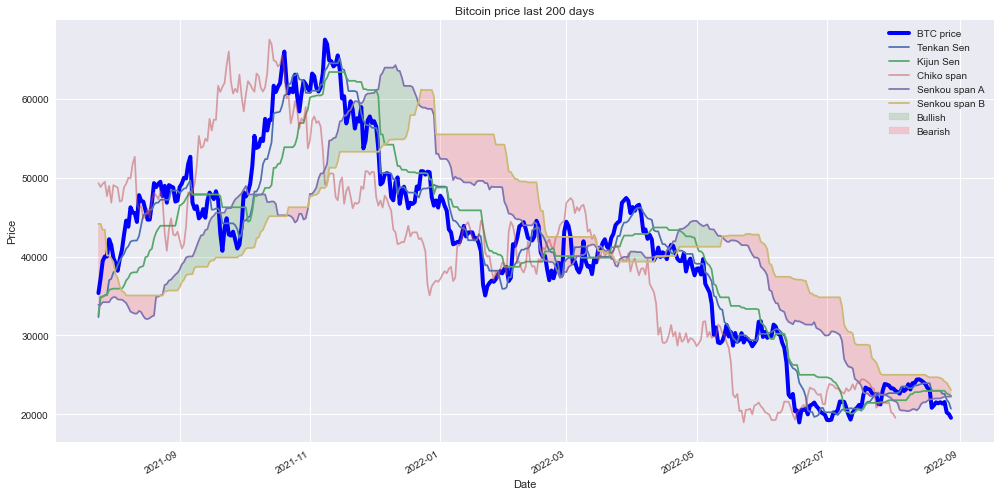

In [13]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')
plt.figure(figsize=(14,7))

# Load data in another dataframe
df3 = pd.read_json("./data/BTC_USDT-1d.json")
df3.columns=['date','open','high','low','close','volume']
df3['date']=(pd.to_datetime(df['date'],unit='ms'))

# Add default Ichimoku
df3['SenkanA'] = pta.ichimoku(high=df3['high'], low=df3['low'], close=df3['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ISA_9']
df3['SenkanB'] = pta.ichimoku(high=df3['high'], low=df3['low'], close=df3['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ISB_26']
df3['Tenkan'] = pta.ichimoku(high=df3['high'], low=df3['low'], close=df3['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ITS_9']
df3['Kijun'] = pta.ichimoku(high=df3['high'], low=df3['low'], close=df3['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['IKS_26']
df3['Chiko'] = pta.ichimoku(high=df3['high'], low=df3['low'], close=df3['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ICS_26']

# df.sort_values(df['Date'], inplace=True)

# Determine days to show in chart
days = 400
dates = df3['date'].tail(days)
price = df3['close'].tail(days)
Tenkan = df3['Tenkan'].tail(days)
Kijun = df3['Kijun'].tail(days)
Chiko = df3['Chiko'].tail(days)
SenkouA = df3['SenkanA'].tail(days)
SenkouB = df3['SenkanB'].tail(days)

# Adding lines
plt.plot_date(dates, price, linestyle='solid', linewidth=4, fmt='b', marker=None, label='BTC price')
plt.plot(dates, Tenkan, label='Tenkan Sen')
plt.plot(dates, Kijun, label='Kijun Sen')
plt.plot(dates, Chiko, label='Chiko span', alpha=0.5)
plt.plot(dates, SenkouA, label='Senkou span A')
plt.plot(dates, SenkouB, label='Senkou span B')

# Fill Kumo Cloud
plt.fill_between(dates, SenkouA, SenkouB, 
                 where=(SenkouA >= SenkouB), color='green', alpha=0.15,
                label='Bullish')
plt.fill_between(dates, SenkouA, SenkouB, 
                 where=(SenkouA <= SenkouB), color='red', alpha=0.15,
                label='Bearish')


plt.gcf().autofmt_xdate()

plt.title('Bitcoin price last 200 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()